# Transform 1 Distribution into another

## Simple distribution + Complex deterministic transformation = Complex distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## We are going to make a 2D guassian distribution into a type of c figure

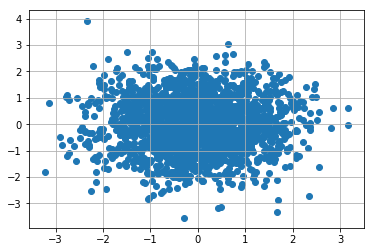

In [2]:
numSamples = 2000;

z = np.random.randn(numSamples,2)               # Sample from Gaussian distribution

z1 = z[:,0]
z2 = z[:,1]

plt.scatter(z1,z2)
plt.hold()
plt.grid(True)
plt.show()

OK, so now that we have our guassian distribution, we can move onto our deterministic function

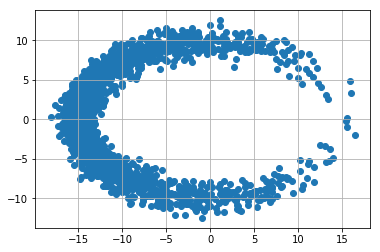

In [3]:
os = 10
ost = np.pi/2

x1 = -(1.5*os+z1)*(np.sin(z2+ost))
x2 = (os+z1)*np.cos(z2+ost)

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)
plt.show()

## That was so easy, it can be called trivial

# A more complicated distribution

In [4]:
def transformation_cvit(z12,z3):

    os = 10
    ost = np.pi/2
    
    x = np.zeros((len(z3),2))

    for i in range(len(z3)):

        z1 = z12[i,0]
        z2 = z12[i,1]

        idx = z3[i]

        if idx==0:
            # C
            x2 = (os+z1)*np.cos(z2+ost)
            x1 = -(1.5*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==1:
            # V
            x1 = 20+(os+z1)*np.cos(z2+ost)
            x2 = 12-0.6*(4*os+z1)*np.abs(np.sin(z2+ost))
        elif idx==2:
            # I
            x2 = (10+z1)*np.cos(z2+ost)
            x1 = 40+(1+z1)*(np.sin(z2+ost))
        elif idx==3:
            # T_h
            x1 = 60+(10+z1)*np.cos(z2+ost)
            x2 = 10+(1+z1)*(np.sin(z2+ost))
        elif idx==4:
            # T_v
            x2 = (10+z1)*np.cos(z2+ost)
            x1 = 60+(1+z1)*(np.sin(z2+ost))

        x[i,0] = x1
        x[i,1] = x2
        
    return x

## We will now sample

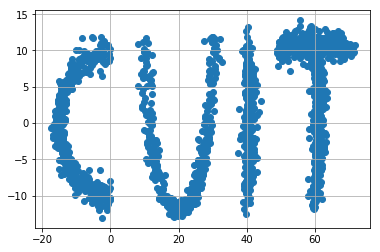

In [5]:
numSamples = 2000

z12 = np.random.randn(numSamples,2)                  # Sample [z1,z2] from Gaussian distribution
z3 = np.random.randint(5,size=(numSamples,1))     # Sample [z3] from Multinomial distribution

x = transformation_cvit(z12,z3)                      # Apply deterministic transformation

x1 = x[:,0];
x2 = x[:,1];

plt.scatter(x1,x2)
plt.hold()
plt.grid(True)

plt.show()

## This example was taken from the CVIT summer school

# Variational Approximation

Let us try to do a variational approximation of the log function  
log(x)=min<sub>λ</sub> {λx−log(λ)−1}

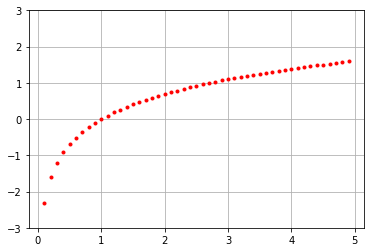

In [7]:
x = np.expand_dims(np.arange(0.1,5,0.1),0)

plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

In [11]:
x0 = 2.     # Evaluate the variational approximation at x=2

lambd = 1/x0    # compute lambda for x0

## This is the crux
We take a Transpose of x, and we multiply it with 1/λ  

In [45]:
#np.tile(arr,numbRep)
# An example of np.tile
print(np.tile([0, 1, 2],[2,2]))
print('this is kinda tricky\n',np.tile([0, 1, 2],[2,1,3]))
print('in the first dimension (first bracket), the repeat occurs twice')
print('in the second dimension (second bracket), the repeat occurs once')
print('in the third dimension (third bracket), the repeat occurs thrice')

[[0 1 2 0 1 2]
 [0 1 2 0 1 2]]
this is kinda tricky
 [[[0 1 2 0 1 2 0 1 2]]

 [[0 1 2 0 1 2 0 1 2]]]
in the first dimension (first bracket), the repeat occurs twice
in the second dimension (second bracket), the repeat occurs once
in the third dimension (third bracket), the repeat occurs thrice


Remember, we want this equation
log(x)=min<sub>λ</sub> {λx−log(λ)−1}

In [46]:
#print(x)
#print(x.T*lambd)
#print(x.shape[1])
#print('The second term is',np.tile(np.log(lambd)+1,[x.shape[1],1]))
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[1],1])   # Variational upper-bounds
print(f_lambda)

[[-0.25685282]
 [-0.20685282]
 [-0.15685282]
 [-0.10685282]
 [-0.05685282]
 [-0.00685282]
 [ 0.04314718]
 [ 0.09314718]
 [ 0.14314718]
 [ 0.19314718]
 [ 0.24314718]
 [ 0.29314718]
 [ 0.34314718]
 [ 0.39314718]
 [ 0.44314718]
 [ 0.49314718]
 [ 0.54314718]
 [ 0.59314718]
 [ 0.64314718]
 [ 0.69314718]
 [ 0.74314718]
 [ 0.79314718]
 [ 0.84314718]
 [ 0.89314718]
 [ 0.94314718]
 [ 0.99314718]
 [ 1.04314718]
 [ 1.09314718]
 [ 1.14314718]
 [ 1.19314718]
 [ 1.24314718]
 [ 1.29314718]
 [ 1.34314718]
 [ 1.39314718]
 [ 1.44314718]
 [ 1.49314718]
 [ 1.54314718]
 [ 1.59314718]
 [ 1.64314718]
 [ 1.69314718]
 [ 1.74314718]
 [ 1.79314718]
 [ 1.84314718]
 [ 1.89314718]
 [ 1.94314718]
 [ 1.99314718]
 [ 2.04314718]
 [ 2.09314718]
 [ 2.14314718]]


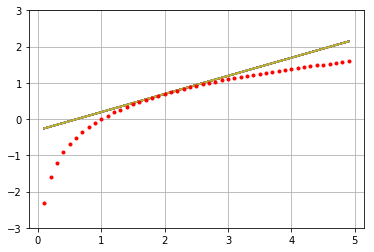

In [47]:
plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

## So we say that the line approximates the curve at λ=1/x
## So our next step is to draw every single line for every lambda

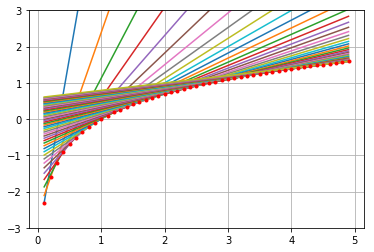

In [48]:
####################################################################
# Variational approximation to Logarithm  (Envelope of upper-bounds)
####################################################################

x = np.expand_dims(np.arange(0.1,5,0.1),0)

lambd = 1/x    # compute lambda for all x
f_lambda = x.T*lambd - np.tile(np.log(lambd)+1,[x.shape[0],1]);   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,np.log(x),'.r')
plt.ylim([-3,3])
plt.grid(True)
plt.show()

## We call this the variational upper bound, those lines bound the curve from the top

## Now we wil do another quick example without any comments
The function that we want the variational upper bound of, is the logistic function

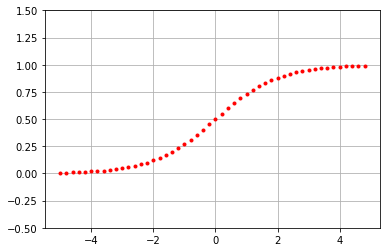

In [49]:
#######################################
# Function: Logistic  [ 1/(1+exp(-x)) ]
#######################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()

The logarithmic function  log(x)
  can be represented variationally as follows,
log(x)=min<sub>λ</sub>{e<sup>λx−H(λ)</sup>}  
 
Where,  H(λ)=−λlog(λ)−(1−λ)log(1−λ)  
In this case, it can be verified that for any given  x, the corresponding  λ can be evaluated as  1/(1+ex). Let us plot the local variational approximation to the logistic function at a given x.

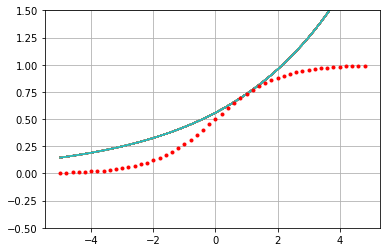

In [50]:
################################################################
# Variational approximation to Logistic  (Evaluation at a point)
################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

x0 = 1.

lambd = 1/(1+np.exp(x0))  # compute lambda for x0

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()


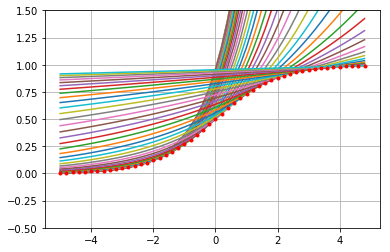

In [51]:
###################################################################
# Variational approximation to Logistic  (Envelope of upper-bounds)
###################################################################

x = np.expand_dims(np.arange(-5,5,0.2),0)

lambd = 1/(1+np.exp(x))  # compute lambda for all x

intercept = np.tile( -lambd*np.log(lambd) -(1-lambd)*np.log(1-lambd),[x.shape[0],1])
f_lambda = np.exp(x.T*lambd - intercept)   # Variational upper-bounds

plt.plot(np.tile(x.T,[1,x.shape[1]]),f_lambda)
plt.hold
plt.plot(x,1/(1+np.exp(-x)),'.r')
plt.ylim([-0.5,1.5])
plt.grid(True)
plt.show()


![title](VAEProof.png)